In [ ]:
# 3 trends
#Capomulin was the only drug (of the 2 drugs we had to consider+placebo) that led to overall tumor shrinkage (-19.4%)
#The other 2 drugs+placebo led to further tumor growth, with Ketapril treated mice showing the greatest overall tumor growth (+57.0%)
#Capomulin had the most amount of surviving mice (n=21) at the end of the 45 timepoint, and Infubinol had the least amount of surviving mice (n=9)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('clinicaltrial_data.csv')
clinicaltrial_df = pd.DataFrame(file)

In [3]:
clinicaltrial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_file = pd.read_csv('mouse_drug_data.csv')
mouse_df= pd.DataFrame(mouse_file)

In [5]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
set(mouse_df['Drug'])

{'Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'}

In [7]:
combined_df = pd.merge(clinicaltrial_df, mouse_df, on='Mouse ID', how='inner')
combined_df = combined_df.sort_values('Timepoint', ascending=True)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


In [8]:
combined_df.reset_index(inplace=True, drop=True)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,i635,0,45.0,0,Propriva
2,g791,0,45.0,0,Ramicane
3,w746,0,45.0,0,Propriva
4,r107,0,45.0,0,Propriva


In [9]:
drug_group = combined_df[['Timepoint','Tumor Volume (mm3)','Drug']]
drug_group = drug_group.groupby(['Drug','Timepoint']).mean()
drug_group.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [10]:
drug_group_sem = combined_df[['Timepoint','Tumor Volume (mm3)','Drug']]
drug_group_sem = drug_group_sem.groupby(['Drug','Timepoint']).sem()
drug_group_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [11]:
capomulin_sem = drug_group_sem['Tumor Volume (mm3)'].loc['Capomulin',:]
capomulin_sem

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
           25           0.881642
           30           0.934460
           35           1.052241
           40           1.223608
           45           1.223977
Name: Tumor Volume (mm3), dtype: float64

In [12]:
infubinol_sem = drug_group_sem['Tumor Volume (mm3)'].loc['Infubinol',:]
infubinol_sem.head()

Drug       Timepoint
Infubinol  0            0.000000
           5            0.235102
           10           0.282346
           15           0.357705
           20           0.476210
Name: Tumor Volume (mm3), dtype: float64

In [13]:
ketapril_sem = drug_group_sem['Tumor Volume (mm3)'].loc['Ketapril',:]
ketapril_sem.head()

Drug      Timepoint
Ketapril  0            0.000000
          5            0.264819
          10           0.357421
          15           0.580268
          20           0.726484
Name: Tumor Volume (mm3), dtype: float64

In [14]:
placebo_sem = drug_group_sem['Tumor Volume (mm3)'].loc['Placebo',:]
placebo_sem.head()

Drug     Timepoint
Placebo  0            0.000000
         5            0.218091
         10           0.402064
         15           0.614461
         20           0.839609
Name: Tumor Volume (mm3), dtype: float64

In [15]:
drug_group_sem.dtypes

Tumor Volume (mm3)    float64
dtype: object

In [16]:
#tumor size over time
drug_group = drug_group.pivot_table(index='Timepoint', columns='Drug')
drug_group.columns = drug_group.columns.droplevel()
drug_group

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


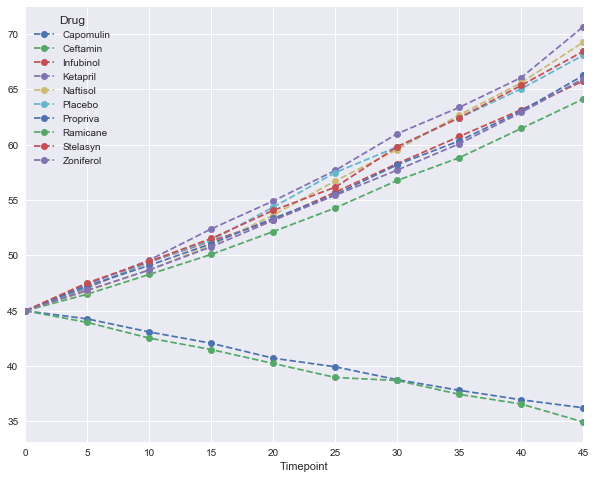

In [17]:
sns.set()
drug_group.plot(linestyle='dashed',marker='o', legend='best', figsize=(10,8), )
#yerr=drug_group_std
plt.show()

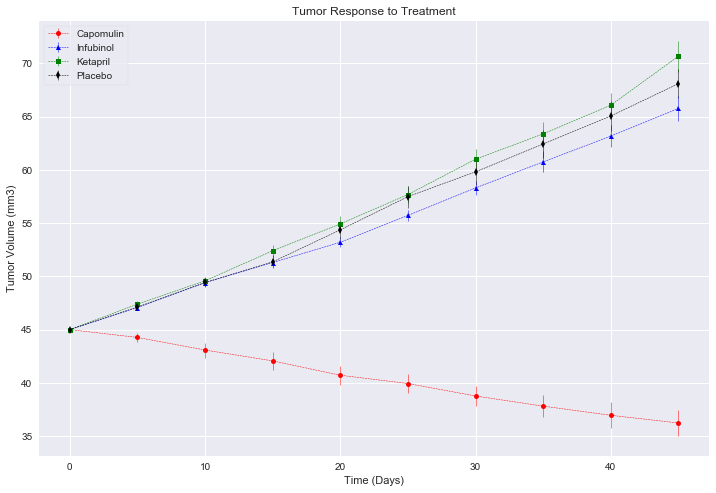

In [18]:

plt.figure(figsize=(12,8))
plt.errorbar(x=drug_group.index,y=drug_group['Capomulin'], yerr=capomulin_sem, color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=drug_group.index,y=drug_group['Infubinol'], yerr=infubinol_sem, color='b', marker='^', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=drug_group.index,y=drug_group['Ketapril'], yerr=ketapril_sem, color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=drug_group.index,y=drug_group['Placebo'], yerr=placebo_sem, color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(frameon=True)

plt.show()

In [19]:
meta_group = combined_df[['Timepoint','Metastatic Sites','Drug']]
meta_group = meta_group.groupby(['Drug','Timepoint']).mean()
meta_group.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [20]:
meta_group_sem = combined_df[['Timepoint','Metastatic Sites','Drug']]
meta_group_sem = meta_group_sem.groupby(['Drug','Timepoint']).sem()
meta_group.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [21]:
capomulin_met_sem = meta_group_sem['Metastatic Sites'].loc['Capomulin',:]
capomulin_met_sem

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
           25           0.181818
           30           0.172944
           35           0.169496
           40           0.175610
           45           0.202591
Name: Metastatic Sites, dtype: float64

In [22]:
infubinol_met_sem = meta_group_sem['Metastatic Sites'].loc['Infubinol',:]
infubinol_met_sem

Drug       Timepoint
Infubinol  0            0.000000
           5            0.091652
           10           0.159364
           15           0.194015
           20           0.234801
           25           0.265753
           30           0.227823
           35           0.224733
           40           0.314466
           45           0.309320
Name: Metastatic Sites, dtype: float64

In [23]:
ketapril_met_sem = meta_group_sem['Metastatic Sites'].loc['Ketapril',:]
ketapril_met_sem

Drug      Timepoint
Ketapril  0            0.000000
          5            0.098100
          10           0.142018
          15           0.191381
          20           0.236680
          25           0.288275
          30           0.347467
          35           0.361418
          40           0.315725
          45           0.278722
Name: Metastatic Sites, dtype: float64

In [24]:
placebo_met_sem = meta_group_sem['Metastatic Sites'].loc['Placebo',:]
placebo_met_sem

Drug     Timepoint
Placebo  0            0.000000
         5            0.100947
         10           0.115261
         15           0.190221
         20           0.234064
         25           0.263888
         30           0.300264
         35           0.341412
         40           0.297294
         45           0.304240
Name: Metastatic Sites, dtype: float64

In [25]:
#metastatic sites over time
meta_group = meta_group.pivot_table(index='Timepoint', columns='Drug')
meta_group.columns = meta_group.columns.droplevel()
meta_group


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


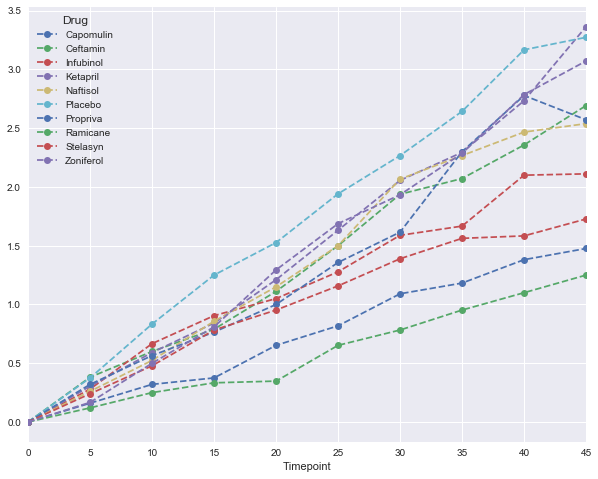

In [26]:
meta_group.plot(linestyle='dashed',marker='o', legend='best', figsize=(10,8), )
plt.show()

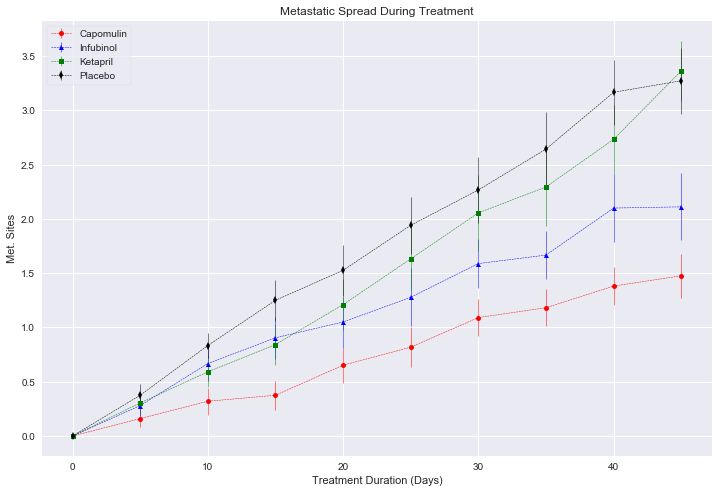

In [27]:
#chart metastatic sites with errorbars
plt.figure(figsize=(12,8))
plt.errorbar(x=meta_group.index,y=meta_group['Capomulin'], yerr=capomulin_met_sem, color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=meta_group.index,y=meta_group['Infubinol'], yerr=infubinol_met_sem, color='b', marker='^', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=meta_group.index,y=meta_group['Ketapril'], yerr=ketapril_met_sem, color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=meta_group.index,y=meta_group['Placebo'], yerr=placebo_met_sem, color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(frameon=True)
plt.show()

In [28]:
survivingmice_group = combined_df[['Timepoint','Mouse ID','Drug']]
survivingmice_group = survivingmice_group.groupby(['Drug','Timepoint']).count()
survivingmice_group.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [29]:
#surviving mice pivot table
survivingmice_group = survivingmice_group.pivot_table(index='Timepoint', columns='Drug')
survivingmice_group.columns = survivingmice_group.columns.droplevel()
survivingmice_group

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


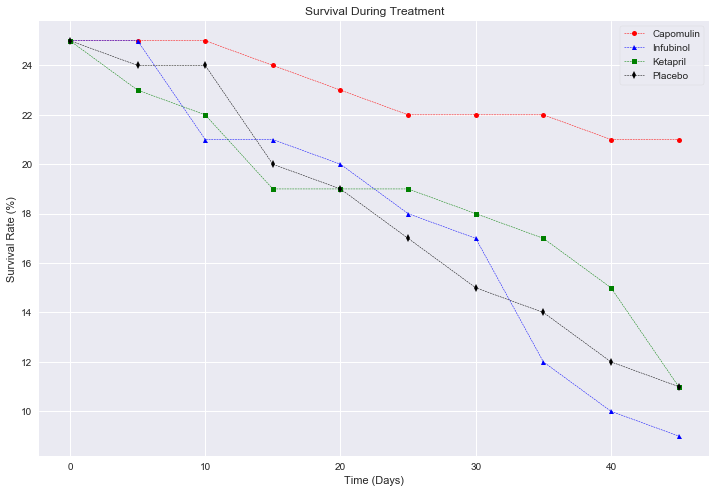

In [30]:
#chart mice survival 
plt.figure(figsize=(12,8))
plt.errorbar(x=survivingmice_group.index,y=survivingmice_group['Capomulin'], color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=survivingmice_group.index,y=survivingmice_group['Infubinol'], color='b', marker='^', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=survivingmice_group.index,y=survivingmice_group['Ketapril'], color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(x=survivingmice_group.index,y=survivingmice_group['Placebo'], color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(frameon=True)

plt.show()

In [31]:
#summary bar graph
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

treatment_summary = combined_df[['Timepoint','Tumor Volume (mm3)','Drug']]
treatment_summary = treatment_summary[treatment_summary['Timepoint'].isin([0,45])]
treatment_summary = treatment_summary.groupby(['Drug', 'Timepoint'], as_index=False).mean()
treatment_summary.set_index('Drug', inplace=True)

treatment_summary

,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,45.000000
Capomulin,45,36.236114
Ceftamin,0,45.000000
Ceftamin,45,64.132421
Infubinol,0,45.000000
Infubinol,45,65.755562
Ketapril,0,45.000000
Ketapril,45,70.662958
Naftisol,0,45.000000


In [32]:
#need to reset pct_change between drugs
#treatment_summary['Timepoint'].pct_change()

#df['pct'] = df.sort_values('Date').groupby(['Company', 'Group']).Value.pct_change()
treatment_summary['Percentage Change']=treatment_summary.groupby('Drug')['Tumor Volume (mm3)'].pct_change()*100
del treatment_summary['Tumor Volume (mm3)']
del treatment_summary['Timepoint']
treatment_summary = treatment_summary.loc[['Capomulin','Infubinol','Ketapril','Placebo']].dropna(how='any')
treatment_summary

,Percentage Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


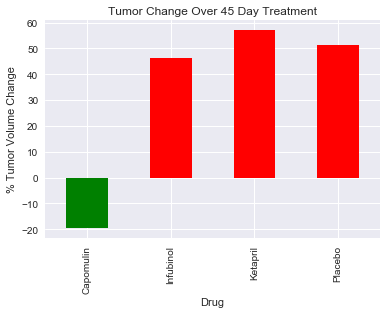

In [41]:
#my_color=np.where(treatment_summary['Percentage Change']=0,'red','green')
#ax = treatment_summary.plot(kind='bar',color=my_color)
colors = [['green','red', 'red', 'red']]
ax = treatment_summary.plot(kind='bar',color=colors)
#ax=ax.map("{:,.1f}%".format <--to display percentages
plt.plot()
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
ax.legend_.remove()
plt.show()